In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

detanet_dir = "/content/drive/MyDrive/Colab Notebooks/DetaNet/code"

if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  import sys

  print('Running on CoLab, mounting google drive...')
  drive.mount('/content/drive')

  base_dir = "/content/drive/MyDrive/Colab Notebooks/CLAMS"
else:
  base_dir = os.getcwd()
  print('Not running on CoLab')

src_dir = os.path.join(base_dir, "src")

sys.path.append(base_dir)
sys.path.append(src_dir)
sys.path.append(detanet_dir)

Running on CoLab, mounting google drive...
Mounted at /content/drive


In [3]:
!pip install dataset
!pip install fvcore
!pip install transformers
!pip install rdkit
!pip install tqdm
!pip install accelerate -U
!pip install e3nn
!pip install torch_geometric
!pip install torch-cluster==1.6.3 -f https://data.pyg.org/whl/torch-2.2.1+cu121.html
!pip install torch-scatter==2.1.2 -f https://data.pyg.org/whl/torch-2.2.1+cu121.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.30
    Uninstalling SQLAlchemy-2.0.30:
      Successfully uninstalled SQLAlchemy-2.0.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.52 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none

In [4]:
import logging
import sys
import warnings
warnings.filterwarnings('ignore')

# Create logger
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# Create STDERR handler
handler = logging.StreamHandler(sys.stdout)

# Create formatter and add it to the handler
formatter = logging.Formatter('%(asctime)-15s %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)

# Set STDERR handler as the only handler
logger.handlers = [handler]

# Read Data

In [5]:
import json

model_config = {
    'run4': {
        'vit': {
            'num_classes': 37,
            'hidden_size': 288,
            'num_hidden_layers': 9,
            'num_attention_heads': 9,
            'intermediate_size': 576,
            'num_channels': 1,
            'image_size': (66, 66),
            'patch_size': (6, 6),
            'hidden_dropout_prob': 0.1,
            'attention_probs_dropout_prob': 0.1,
            'batch_size': 300,
            'model_dir': os.path.join(base_dir, "models", "vit_models", 'run4')
        },
        'vit_training': {
            'num_epochs': 100,
            'lr': 1e-3,
            'step_size': 1,
            'gamma': 0.975,
            'early_stopping_epochs': 5,
        },
        'ic_training': {
            'batch_size': 300,
            'model_dir': os.path.join(base_dir, "models", "ic_models", 'run4'),
            'num_train_epochs': 120,
            'save_total_limit': 3,
            'max_length': 30,
            'num_beams': 5,
            'early_stopping_patience': 5,
            'canonicalize': True
        }
    },
    'run7': {
        'vit': {
            'num_classes': 18,
            'hidden_size': 288,
            'num_hidden_layers': 9,
            'num_attention_heads': 9,
            'intermediate_size': 576,
            'num_channels': 1,
            'image_size': (66, 66),
            'patch_size': (6, 6),
            'hidden_dropout_prob': 0.1,
            'attention_probs_dropout_prob': 0.1,
            'batch_size': 300,
            'model_dir': os.path.join(base_dir, "models", "vit_models", 'run7')
        },
        'vit_training': {
            'num_epochs': 100,
            'lr': 1e-3,
            'step_size': 1,
            'gamma': 0.975,
            'early_stopping_epochs': 5,
        },
        'ic_training': {
            'batch_size': 300,
            'model_dir': os.path.join(base_dir, "models", "ic_models", 'run7'),
            'num_train_epochs': 120,
            'save_total_limit': 3,
            'max_length': 30,
            'num_beams': 5,
            'early_stopping_patience': 5,
            'canonicalize': False
        },
    },
}

with open(os.path.join(base_dir, "configs/model_config.json"), "w") as f_hd:
    json.dump(model_config, f_hd)

In [6]:
from ir_dataset import IrDataset
from ir_smarts import SMARTS

run = 'run7'
config = model_config[run]

ds = IrDataset(data_list=None, data_path=os.path.join(base_dir, "data"), \
               use_transmittance=False, ir_only=False, \
               canonicalize=config['ic_training']['canonicalize'], \
               smarts=SMARTS)
ds.load()

2024-06-23 14:11:11,405 rdkit - INFO - Enabling RDKit 2023.09.6 jupyter extensions
2024-06-23 14:11:14,303 numexpr.utils - INFO - NumExpr defaulting to 8 threads.
2024-06-23 14:11:14,579 root - INFO - Loading ir feature data from /content/drive/MyDrive/Colab Notebooks/CLAMS/data/ir_features.pth...
2024-06-23 14:12:33,439 root - INFO - Loading ir label data from /content/drive/MyDrive/Colab Notebooks/CLAMS/data/ir_labels.pth...
2024-06-23 14:12:42,940 root - INFO - Loading uv feature data from /content/drive/MyDrive/Colab Notebooks/CLAMS/data/uv_features.pth...
2024-06-23 14:12:56,690 root - INFO - Loading uv label data from /content/drive/MyDrive/Colab Notebooks/CLAMS/data/uv_labels.pth...
2024-06-23 14:13:05,398 root - INFO - Loading nmr feature data from /content/drive/MyDrive/Colab Notebooks/CLAMS/data/nmr_features.pth...
2024-06-23 14:13:27,297 root - INFO - Loading nmr label data from /content/drive/MyDrive/Colab Notebooks/CLAMS/data/nmr_labels.pth...
2024-06-23 14:13:36,634 root 

In [ ]:
len(ds)

127465

In [7]:
from rdkit import Chem

def determine_elements(smiles):
    # Parse the SMILES string and create a molecule object
    mol = Chem.MolFromSmiles(smiles)

    if mol is None:
        print("Invalid SMILES string")
        return

    # Get the atomic symbols of the atoms in the molecule
    elements = set(atom.GetSymbol() for atom in mol.GetAtoms())
    mol_with_hydrogens = Chem.AddHs(mol)
    num_atoms = mol_with_hydrogens.GetNumAtoms()

    return elements, num_atoms, mol

all_elements = set()
num_atoms_max = 0
mol_largest = None

for item in ds:
    elements, num_atoms, mol = determine_elements(item[1])
    all_elements.update(elements)

    if num_atoms > num_atoms_max:
        num_atoms_max = num_atoms
        mol_largest = mol


logging.info("Max. number of atoms: %s, all_elements: %s", num_atoms_max, all_elements)

2024-06-23 14:15:06,866 root - INFO - Max. number of atoms: 29, all_elements: {'C', 'N', 'F', 'O'}


In [ ]:
import torch

fgs = []
for item in ds:
    fgs.append(item[0].unsqueeze(0))

fg_labels = torch.cat(fgs, dim=0)
fg_labels.sum(dim=0)

tensor([118733,  16431,  15980,    273,   2057,  40664,  14261,  13991,   4458,
         56297,  38794,   8735,  15906,    601,  14261,   3102,   1514,    940])

# Prepare Data

In [8]:
import torch
from torch.utils.data import DataLoader, Dataset, random_split

batch_size = config['vit']['batch_size']

# Define the sizes of training, validation, and test sets
train_size = int(0.8 * len(ds))  # 80% of the data for training
val_size = int(0.1 * len(ds))    # 10% of the data for validation
test_size = len(ds) - train_size - val_size  # Remaining for testing

# Use random_split to split the dataset
torch.manual_seed(622)
train_dataset, val_dataset, test_dataset = random_split(ds, [train_size, val_size, test_size])

# You can optionally print the sizes of the splits
logging.info(f"Training set size: {len(train_dataset)}")
logging.info(f"Validation set size: {len(val_dataset)}")
logging.info(f"Testing set size: {len(test_dataset)}")

num_workers = 4
prefetch_factor = 2

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, \
                          num_workers=num_workers, prefetch_factor=prefetch_factor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, \
                        num_workers=num_workers, prefetch_factor=prefetch_factor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

2024-06-23 14:15:06,957 root - INFO - Training set size: 101972
2024-06-23 14:15:06,958 root - INFO - Validation set size: 12746
2024-06-23 14:15:06,959 root - INFO - Testing set size: 12747


In [9]:
from ir_dataset import generate_ic_dataset
import json
from transformers import AutoTokenizer

# Pre-trained tokenizer
pretrained_decodert_dir = "seyonec/PubChem10M_SMILES_BPE_450k"
roberta_tokenizer = AutoTokenizer.from_pretrained(pretrained_decodert_dir)


ic_train_set = generate_ic_dataset(train_dataset, roberta_tokenizer,
                              max_length = config['ic_training']['max_length'])
ic_val_set = generate_ic_dataset(val_dataset, roberta_tokenizer,
                              max_length = config['ic_training']['max_length'])
ic_test_set = generate_ic_dataset(test_dataset, roberta_tokenizer,
                              max_length = config['ic_training']['max_length'])

tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/515 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/165k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/101k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

## Benchmarking

In [10]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

logging.info("Device: %s", device)

2024-06-23 14:15:43,144 root - INFO - Device: cpu


In [11]:
model_chk_point = config['ic_training']['model_dir']
model_chk_point

'/content/drive/MyDrive/Colab Notebooks/CLAMS/models/ic_models/run7'

In [12]:
from metrics import calc_topk, predict_smiles
from transformers import AutoTokenizer, VisionEncoderDecoderModel

clams = VisionEncoderDecoderModel.from_pretrained(model_chk_point)
pretrained_decodert_dir = "seyonec/PubChem10M_SMILES_BPE_450k"
roberta_tokenizer = AutoTokenizer.from_pretrained(pretrained_decodert_dir)

The following encoder weights were not tied to the decoder ['vision_encoder_decoder/layernorm', 'vision_encoder_decoder/pooler', 'vision_encoder_decoder/embeddings', 'vision_encoder_decoder/encoder']
The following encoder weights were not tied to the decoder ['vision_encoder_decoder/layernorm', 'vision_encoder_decoder/pooler', 'vision_encoder_decoder/embeddings', 'vision_encoder_decoder/encoder']
The following encoder weights were not tied to the decoder ['vision_encoder_decoder/layernorm', 'vision_encoder_decoder/pooler', 'vision_encoder_decoder/embeddings', 'vision_encoder_decoder/encoder']


In [ ]:
import torch
from fvcore.nn import FlopCountAnalysis


clams.eval()
input_ids = roberta_tokenizer("C", return_tensors="pt").input_ids
input_tensor = ic_test_set[0]['pixel_values'].unsqueeze(0)

# Calculate FLOPs
flop_counter = FlopCountAnalysis(clams, (input_tensor, input_ids))
flops = flop_counter.total()
flops

2024-06-22 10:54:40,883 fvcore.nn.jit_analysis - WARNING - Unsupported operator aten::add encountered 53 time(s)
2024-06-22 10:54:40,885 fvcore.nn.jit_analysis - WARNING - Unsupported operator aten::div encountered 21 time(s)
2024-06-22 10:54:40,886 fvcore.nn.jit_analysis - WARNING - Unsupported operator aten::softmax encountered 21 time(s)
2024-06-22 10:54:40,887 fvcore.nn.jit_analysis - WARNING - Unsupported operator aten::gelu encountered 16 time(s)
2024-06-22 10:54:40,892 fvcore.nn.jit_analysis - WARNING - Unsupported operator aten::repeat encountered 1 time(s)
2024-06-22 10:54:40,893 fvcore.nn.jit_analysis - WARNING - Unsupported operator aten::le encountered 1 time(s)
2024-06-22 10:54:40,894 fvcore.nn.jit_analysis - WARNING - Unsupported operator aten::mul encountered 4 time(s)
2024-06-22 10:54:40,896 fvcore.nn.jit_analysis - WARNING - Unsupported operator aten::rsub encountered 2 time(s)
2024-06-22 10:54:40,899 fvcore.nn.jit_analysis - WARNING - Unsupported operator aten::ne enc

1974717504

## Top-k performance

In [ ]:
import numpy as np


perf, unmatched, y_true, y_pred = calc_topk(clams, roberta_tokenizer, ic_test_set, \
                    topks=[1, 5, 10, 15], num_beams=15, batch_size=100)

logging.info("Performance: %s", perf)

with open(os.path.join(model_chk_point, "unmatched.json"), "w") as fd:
    json.dump(unmatched, fd)

np.save(os.path.join(model_chk_point, "y_true_test.npy"), np.array(y_true))
np.save(os.path.join(model_chk_point, "y_pred_test.npy"), np.array(y_pred))

2024-05-27 18:55:59,648 root - INFO - Generating predictions with 15 return sequences...


Streaming output truncated to the last 5000 lines.
[22:11:13] SMILES Parse Error: syntax error while parsing: CCC1CC1C(F)(F)F(=
[22:11:13] SMILES Parse Error: Failed parsing SMILES 'CCC1CC1C(F)(F)F(=' for input: 'CCC1CC1C(F)(F)F(='
[22:11:13] SMILES Parse Error: extra close parentheses while parsing: CC1O)COC1
[22:11:13] SMILES Parse Error: Failed parsing SMILES 'CC1O)COC1' for input: 'CC1O)COC1'
[22:11:13] SMILES Parse Error: extra close parentheses while parsing: CC11O)COC1
[22:11:13] SMILES Parse Error: Failed parsing SMILES 'CC11O)COC1' for input: 'CC11O)COC1'
[22:11:13] Explicit valence for atom # 0 O, 3, is greater than permitted
[22:11:13] SMILES Parse Error: unclosed ring for input: 'O=CC1COCC1C#N2'
[22:11:13] SMILES Parse Error: unclosed ring for input: 'CC1C2C3CC(C)COC23'
[22:11:13] SMILES Parse Error: unclosed ring for input: 'CC1C2C3CC(C)OCC23'
[22:11:13] SMILES Parse Error: extra close parentheses while parsing: CC1(CC=O)CC1CO)
[22:11:13] SMILES Parse Error: Failed parsing

2024-05-27 22:11:19,573 root - INFO - Calculating top-1 accuracy...


[22:11:19] SMILES Parse Error: Failed parsing SMILES 'OC(((C#C)(C#C)C#N' for input: 'OC(((C#C)(C#C)C#N'
[22:11:19] SMILES Parse Error: syntax error while parsing: OC((C#C)(C#N)C#N
[22:11:19] SMILES Parse Error: Failed parsing SMILES 'OC((C#C)(C#N)C#N' for input: 'OC((C#C)(C#N)C#N'
[22:11:19] SMILES Parse Error: syntax error while parsing: OC(((C#C)(C#N)C#C
[22:11:19] SMILES Parse Error: Failed parsing SMILES 'OC(((C#C)(C#N)C#C' for input: 'OC(((C#C)(C#N)C#C'
[22:11:19] SMILES Parse Error: syntax error while parsing: OC(((C#N)C#C)C#N
[22:11:19] SMILES Parse Error: Failed parsing SMILES 'OC(((C#N)C#C)C#N' for input: 'OC(((C#N)C#C)C#N'
[22:11:19] SMILES Parse Error: syntax error while parsing: OC(((C#C)C#C)C#N
[22:11:19] SMILES Parse Error: Failed parsing SMILES 'OC(((C#C)C#C)C#N' for input: 'OC(((C#C)C#C)C#N'
[22:11:19] SMILES Parse Error: syntax error while parsing: OC(((C#N)(C#C)C#N
[22:11:19] SMILES Parse Error: Failed parsing SMILES 'OC(((C#N)(C#C)C#N' for input: 'OC(((C#N)(C#C)C#N'


2024-05-27 22:11:19,637 root - INFO - Calculating top-5 accuracy...
2024-05-27 22:11:19,683 root - INFO - Calculating top-10 accuracy...
2024-05-27 22:11:19,726 root - INFO - Calculating top-15 accuracy...
2024-05-27 22:11:19,781 root - INFO - Performance: {1: 0.45155722915195734, 5: 0.7290342825762924, 10: 0.8005020789205303, 15: 0.8255275751157135}


# Structural Elucidation Examples

In [35]:
import matplotlib.pyplot as plt
from rdkit import Chem
import os

def draw_mols(clams, roberta_tokenizer, ic_test_set, idx, font_size=22,
              grey_scale=True, text="", fig_name=None):

    true_smiles = ic_test_set[idx]['smiles']
    true_mol = Chem.MolFromSmiles(true_smiles)

    pred_smiles = predict_smiles(clams, roberta_tokenizer,
                ic_test_set[idx]['pixel_values'].unsqueeze(0),
                num_beams=15,
                do_sample=False)[0]

    pred_mols = [Chem.MolFromSmiles(smiles) for smiles in pred_smiles]
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    # Add the additional text to the upper left corner
    fig.text(0.01, 0.985, text, ha='left', va='top', fontsize=font_size)

    # Draw RDKit molecules and integrate into Matplotlib subplots
    axes[0, 0].set_title(f"Truth: {ic_test_set[idx]['smiles']}",
                  fontsize=font_size,
                  color='black',
                  bbox={'facecolor': 'white', 'edgecolor': 'black', 'boxstyle': 'round'})
    if grey_scale:
        true_mol_img = Chem.Draw.MolToImage(true_mol)
        axes[0, 0].imshow(true_mol_img.convert("L"), cmap='Greys_r')
    else:
        axes[0, 0].imshow(Chem.Draw.MolToImage(true_mol))

    axes[0, 0].axis('off')

    for i in range(1, 6):
        if grey_scale:
            title_color = 'black'
        else:
            title_color = 'green' if Chem.CanonSmiles(pred_smiles[i-1]) == \
                  Chem.CanonSmiles(true_smiles) else 'red'

        if Chem.CanonSmiles(pred_smiles[i-1]) == Chem.CanonSmiles(true_smiles):
            axes[i//3, i%3].set_title(f"Pred#{i}: {pred_smiles[i-1]}",
                      fontsize=font_size,
                      bbox={'facecolor': 'white', 'edgecolor': 'black', 'boxstyle': 'round'},
                      color=title_color)
        else:
            axes[i//3, i%3].set_title(f"Pred#{i}: {pred_smiles[i-1]}",
                    fontsize=font_size,
                    color=title_color)

        if grey_scale:
            pred_mol_img = Chem.Draw.MolToImage(pred_mols[i-1])
            axes[i//3, i%3].imshow(pred_mol_img.convert("L"), cmap='Greys_r')
        else:
            axes[i//3, i%3].imshow(Chem.Draw.MolToImage(pred_mols[i-1]))

        axes[i//3, i%3].set_xticklabels([])
        axes[i//3, i%3].set_yticklabels([])
        axes[i//3, i%3].axis('off')

    plt.tight_layout()

    if fig_name:
        plt.savefig(os.path.join(base_dir, 'figs', f'{fig_name}.png'), dpi=300)

    plt.show()

[14:38:06] SMILES Parse Error: unclosed ring for input: 'CCCN=C(C)N=NN1'
[14:38:06] SMILES Parse Error: unclosed ring for input: 'CCCN=C(N)N=NN1'
[14:38:06] SMILES Parse Error: extra close parentheses while parsing: CCCC1=NNC(N)=N1)
[14:38:06] SMILES Parse Error: Failed parsing SMILES 'CCCC1=NNC(N)=N1)' for input: 'CCCC1=NNC(N)=N1)'


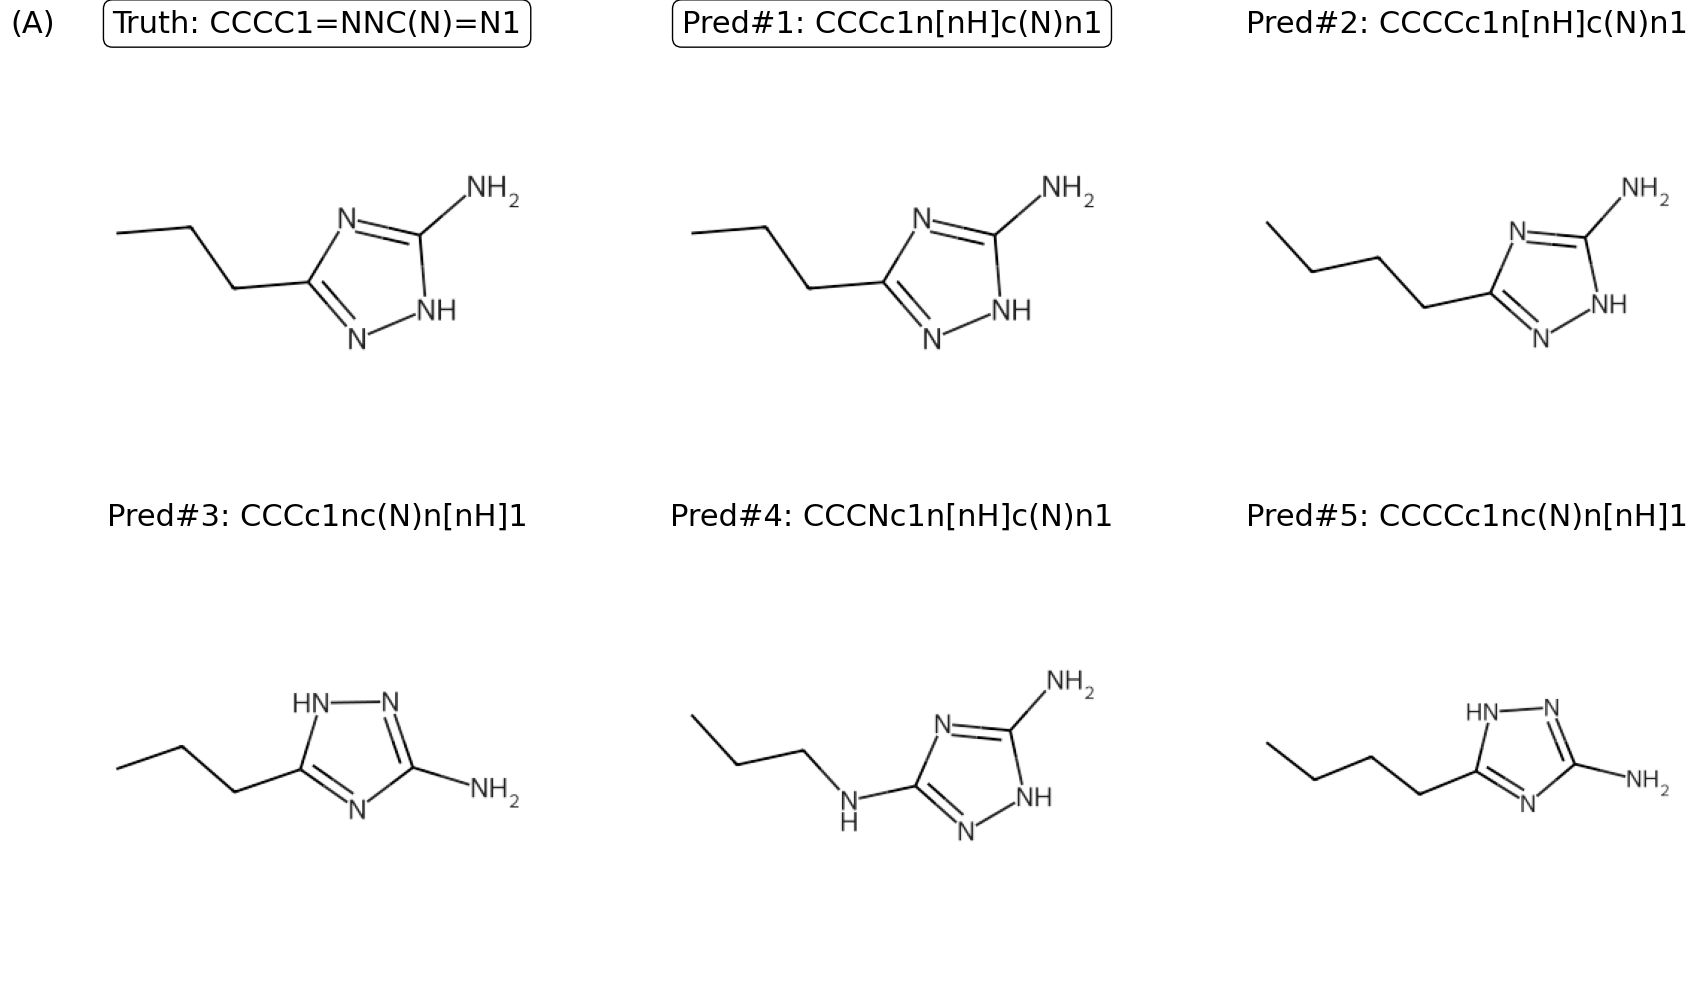

In [38]:
rand_id = 8225
draw_mols(clams, roberta_tokenizer, ic_test_set, rand_id, text="(A)", fig_name="Fig.4(A)")

[14:38:01] SMILES Parse Error: syntax error while parsing: (C)N(C)C(=O)NC
[14:38:01] SMILES Parse Error: Failed parsing SMILES '(C)N(C)C(=O)NC' for input: '(C)N(C)C(=O)NC'
[14:38:01] SMILES Parse Error: syntax error while parsing: (C)C(=O)N(C)C
[14:38:01] SMILES Parse Error: Failed parsing SMILES '(C)C(=O)N(C)C' for input: '(C)C(=O)N(C)C'


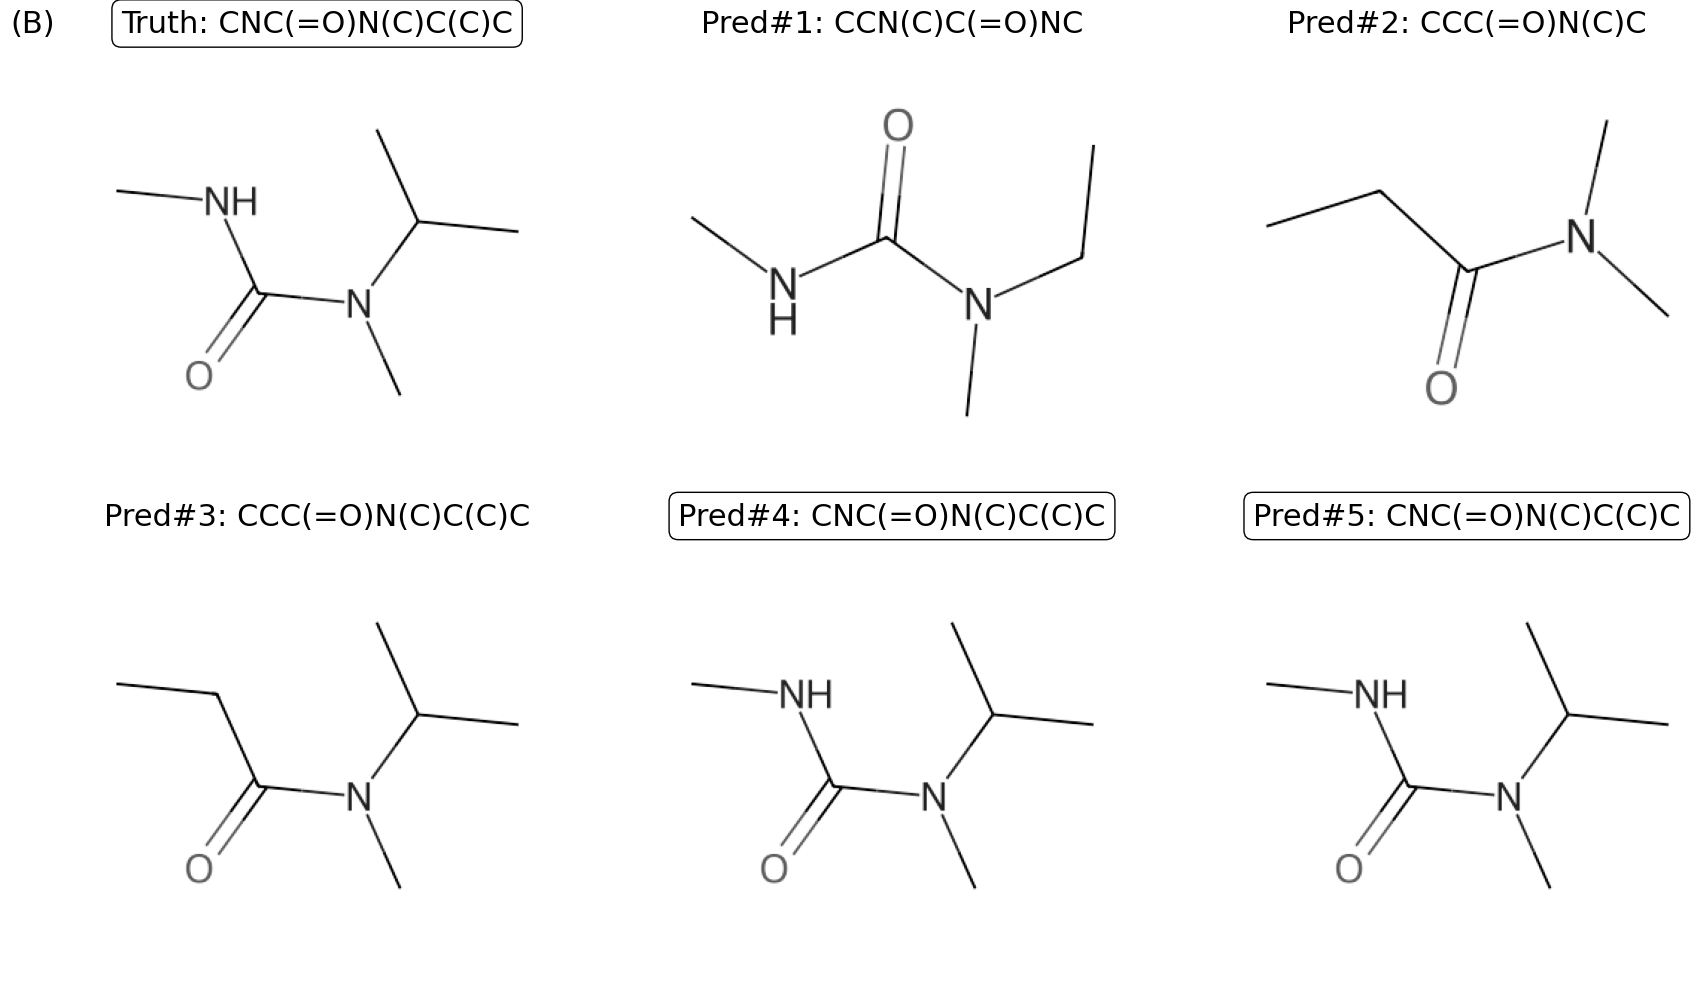

In [37]:
rand_id = 3920
draw_mols(clams, roberta_tokenizer, ic_test_set, rand_id, text="(B)", fig_name="Fig.4(B)")

[14:37:51] SMILES Parse Error: ring closure 3 duplicates bond between atom 2 and atom 3 for input: 'OC12C3C3C1C1C=CC21'
[14:37:51] SMILES Parse Error: unclosed ring for input: 'OC12CC(C=C1)C1C2'
[14:37:51] SMILES Parse Error: unclosed ring for input: 'OC12CC3C1C1C=CC21'
[14:37:51] SMILES Parse Error: ring closure 1 duplicates bond between atom 6 and atom 7 for input: 'OC12CC(C=C1)C1C21'


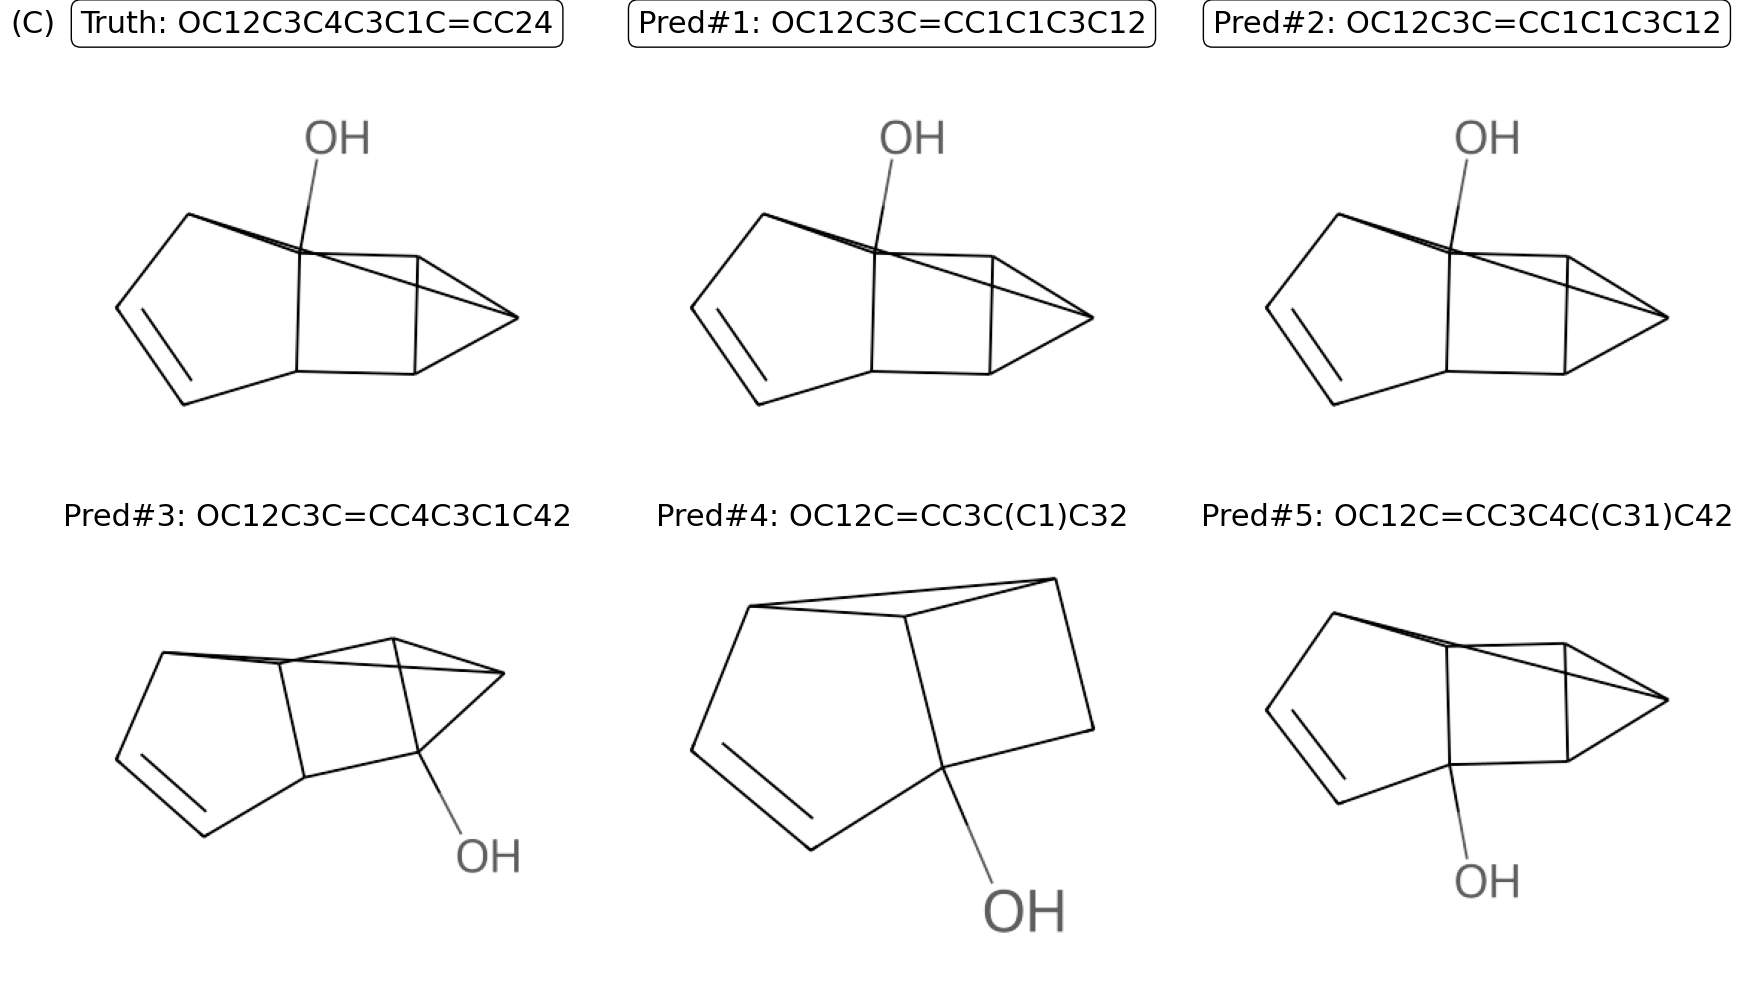

In [36]:
rand_id = 7717
draw_mols(clams, roberta_tokenizer, ic_test_set, rand_id, text="(C)", fig_name="Fig.4(C)")

[14:38:14] Explicit valence for atom # 5 O, 3, is greater than permitted
[14:38:14] Explicit valence for atom # 5 O, 3, is greater than permitted
[14:38:14] Explicit valence for atom # 5 O, 3, is greater than permitted


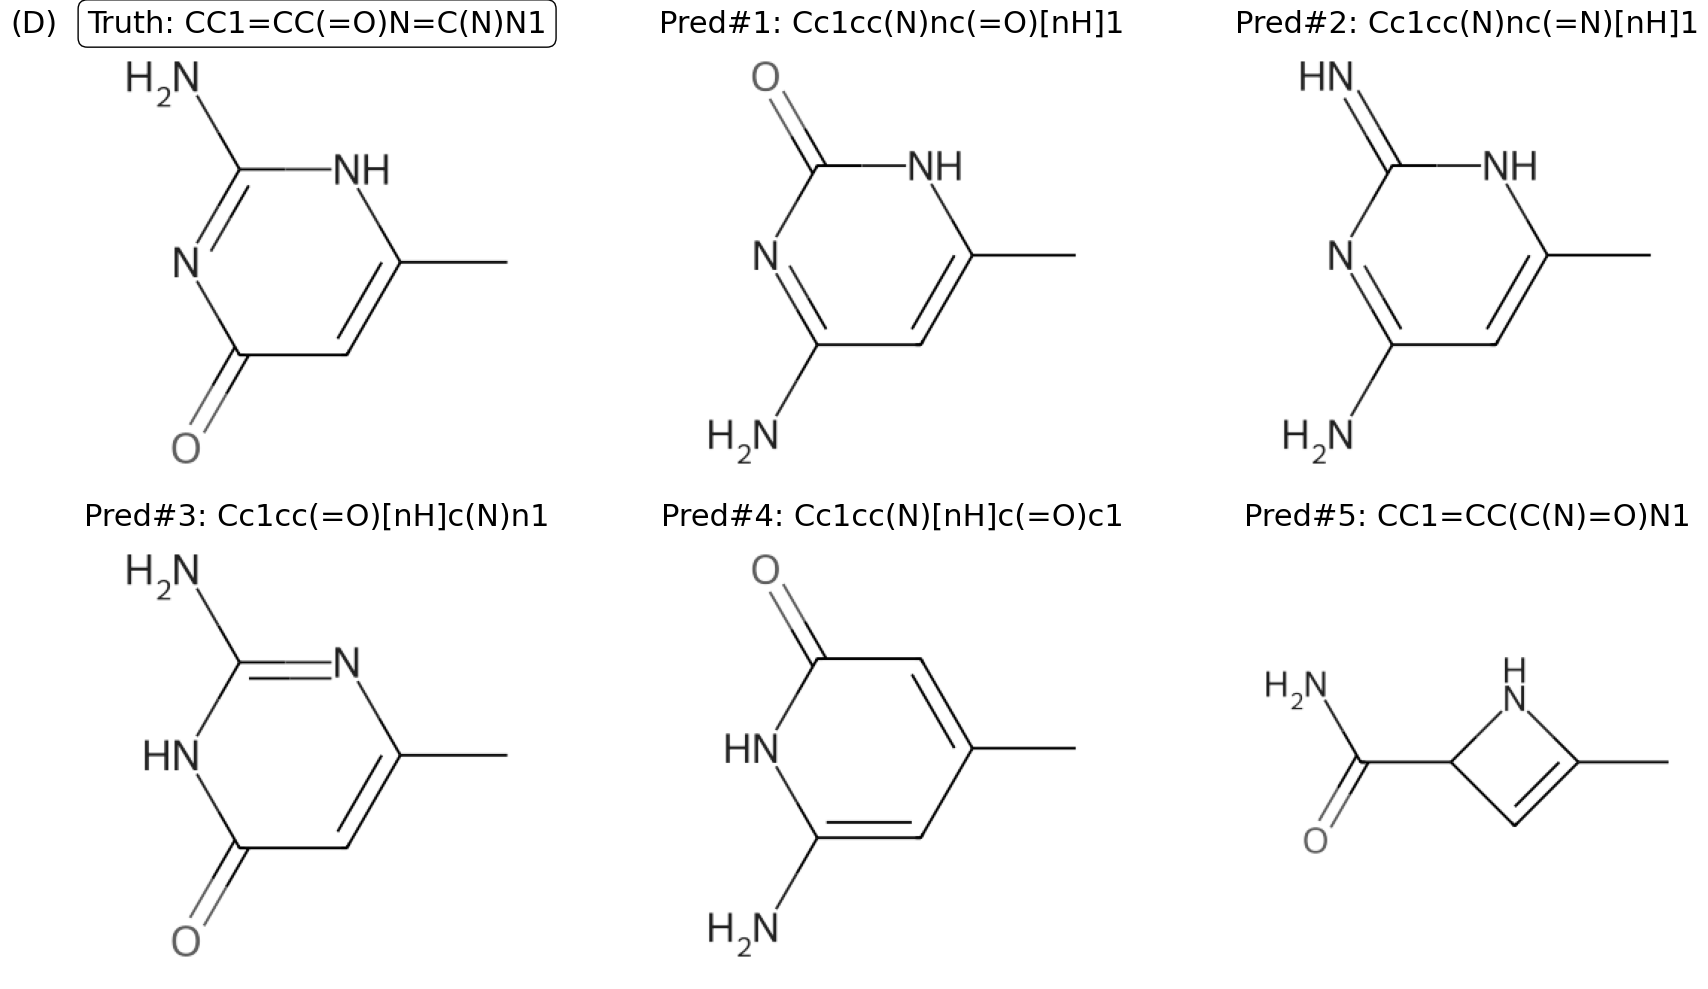

In [39]:
rand_id = 9373
draw_mols(clams, roberta_tokenizer, ic_test_set, rand_id, text="(D)", fig_name="Fig.4(D)")

[14:38:43] SMILES Parse Error: unclosed ring for input: 'OC1C=C2CC3C(O)C13'


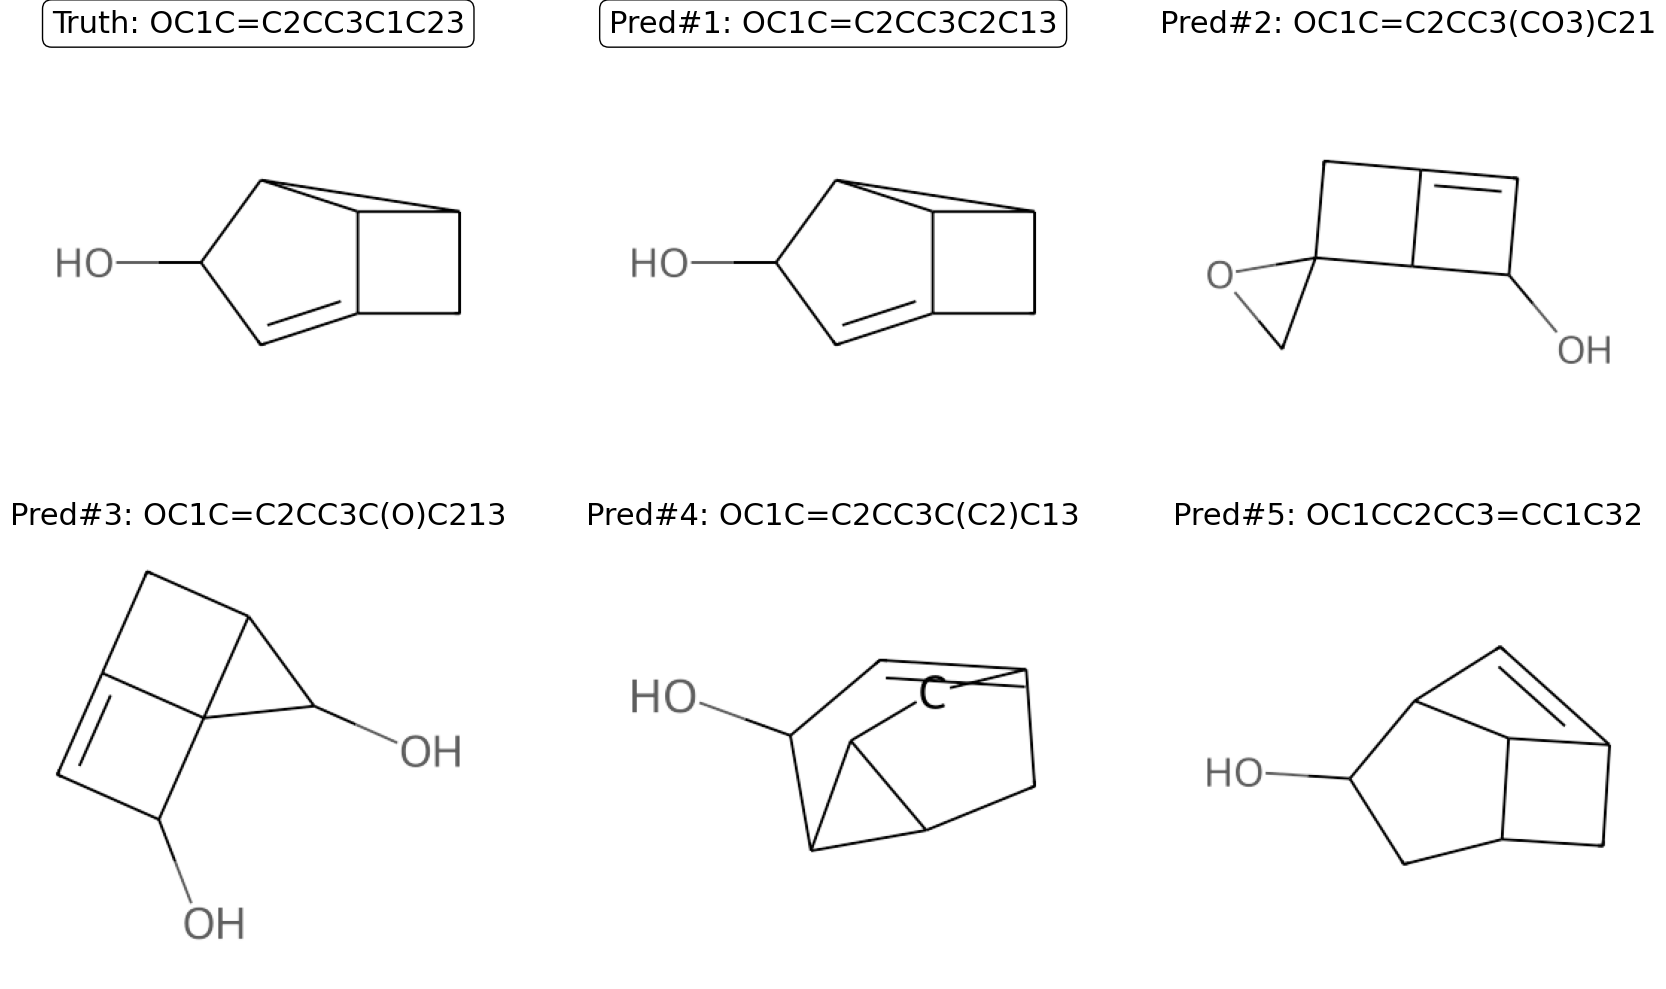

In [42]:
rand_id = int(torch.randint(0, len(ic_test_set), (1,)))
draw_mols(clams, roberta_tokenizer, ic_test_set, rand_id)

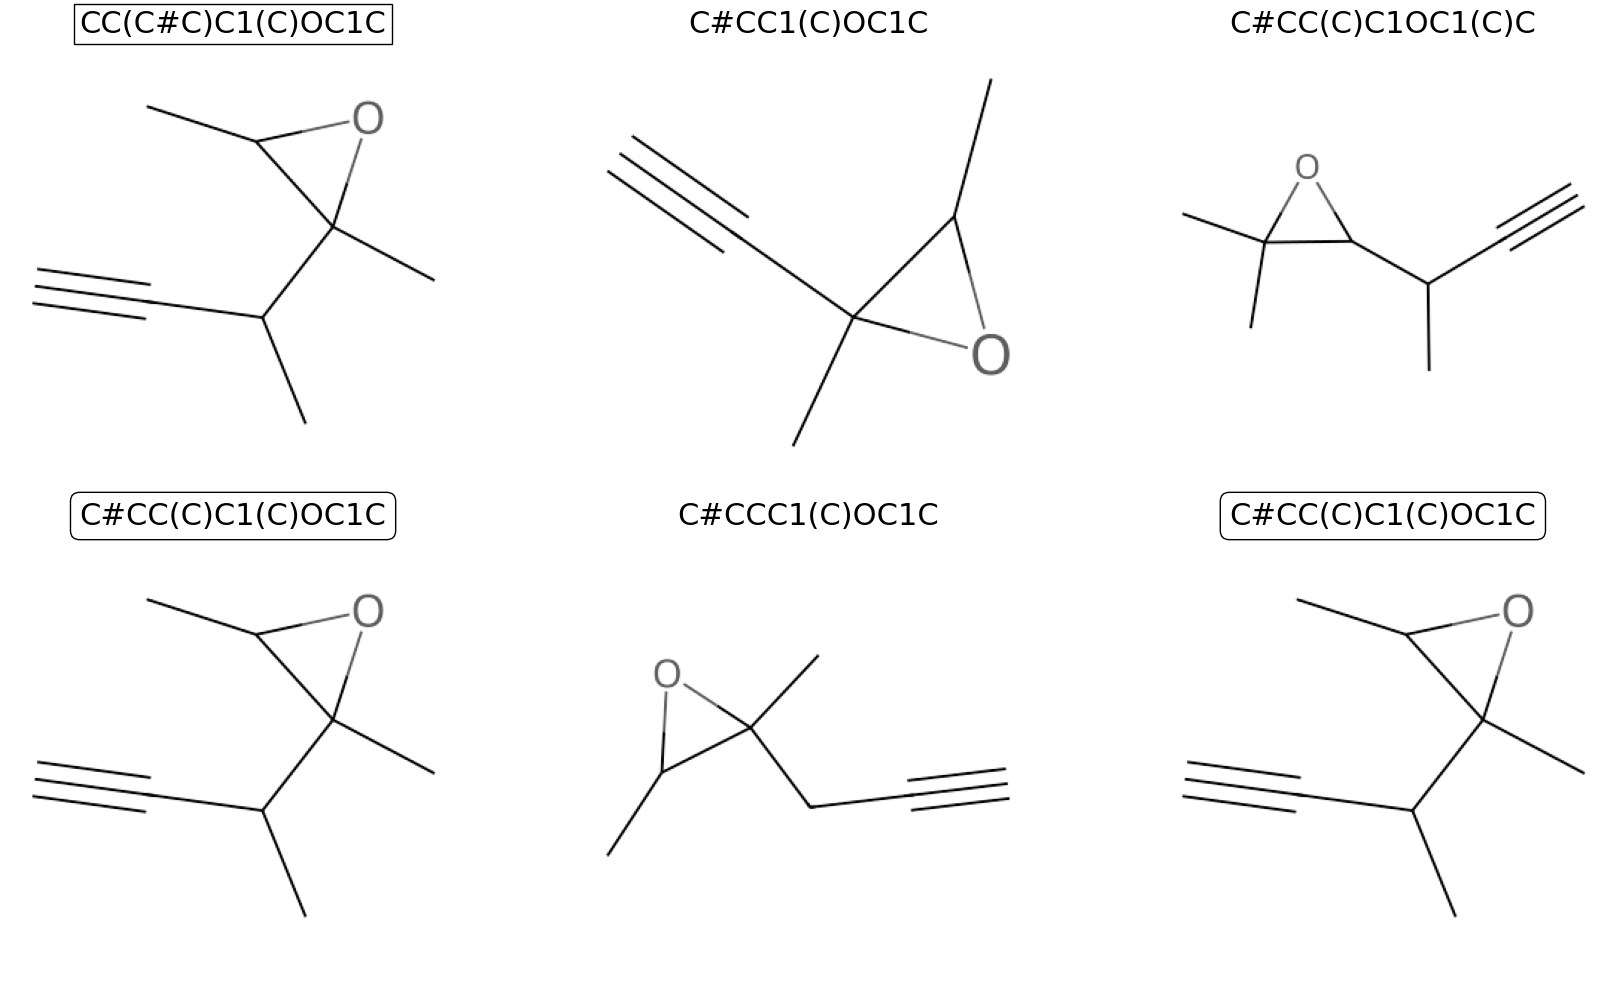

In [ ]:
rand_id = int(torch.randint(0, len(ic_test_set), (1,)))
draw_mols(clams, roberta_tokenizer, ic_test_set, rand_id)

[02:46:28] SMILES Parse Error: unclosed ring for input: 'CCCN=C(C)N=NN1'
[02:46:28] SMILES Parse Error: unclosed ring for input: 'CCCN=C(N)N=NN1'
[02:46:28] SMILES Parse Error: extra close parentheses while parsing: CCCC1=NNC(N)=N1)
[02:46:28] SMILES Parse Error: Failed parsing SMILES 'CCCC1=NNC(N)=N1)' for input: 'CCCC1=NNC(N)=N1)'


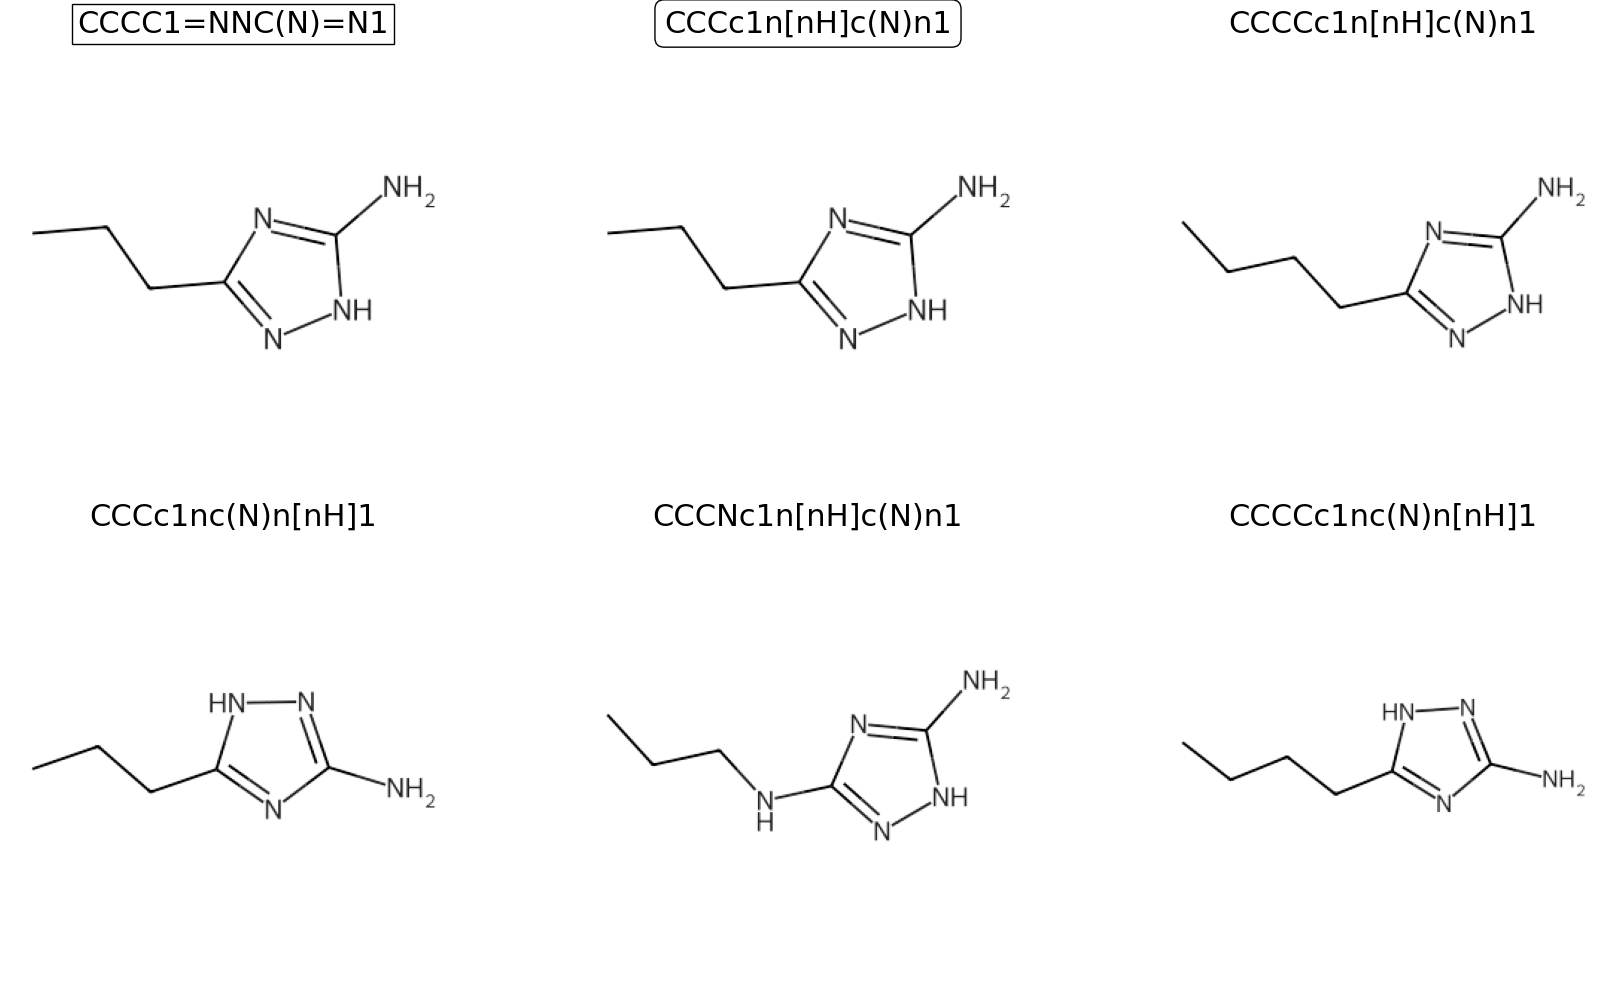

[02:46:31] SMILES Parse Error: unclosed ring for input: 'OC1C=C2CC3C(O)C13'


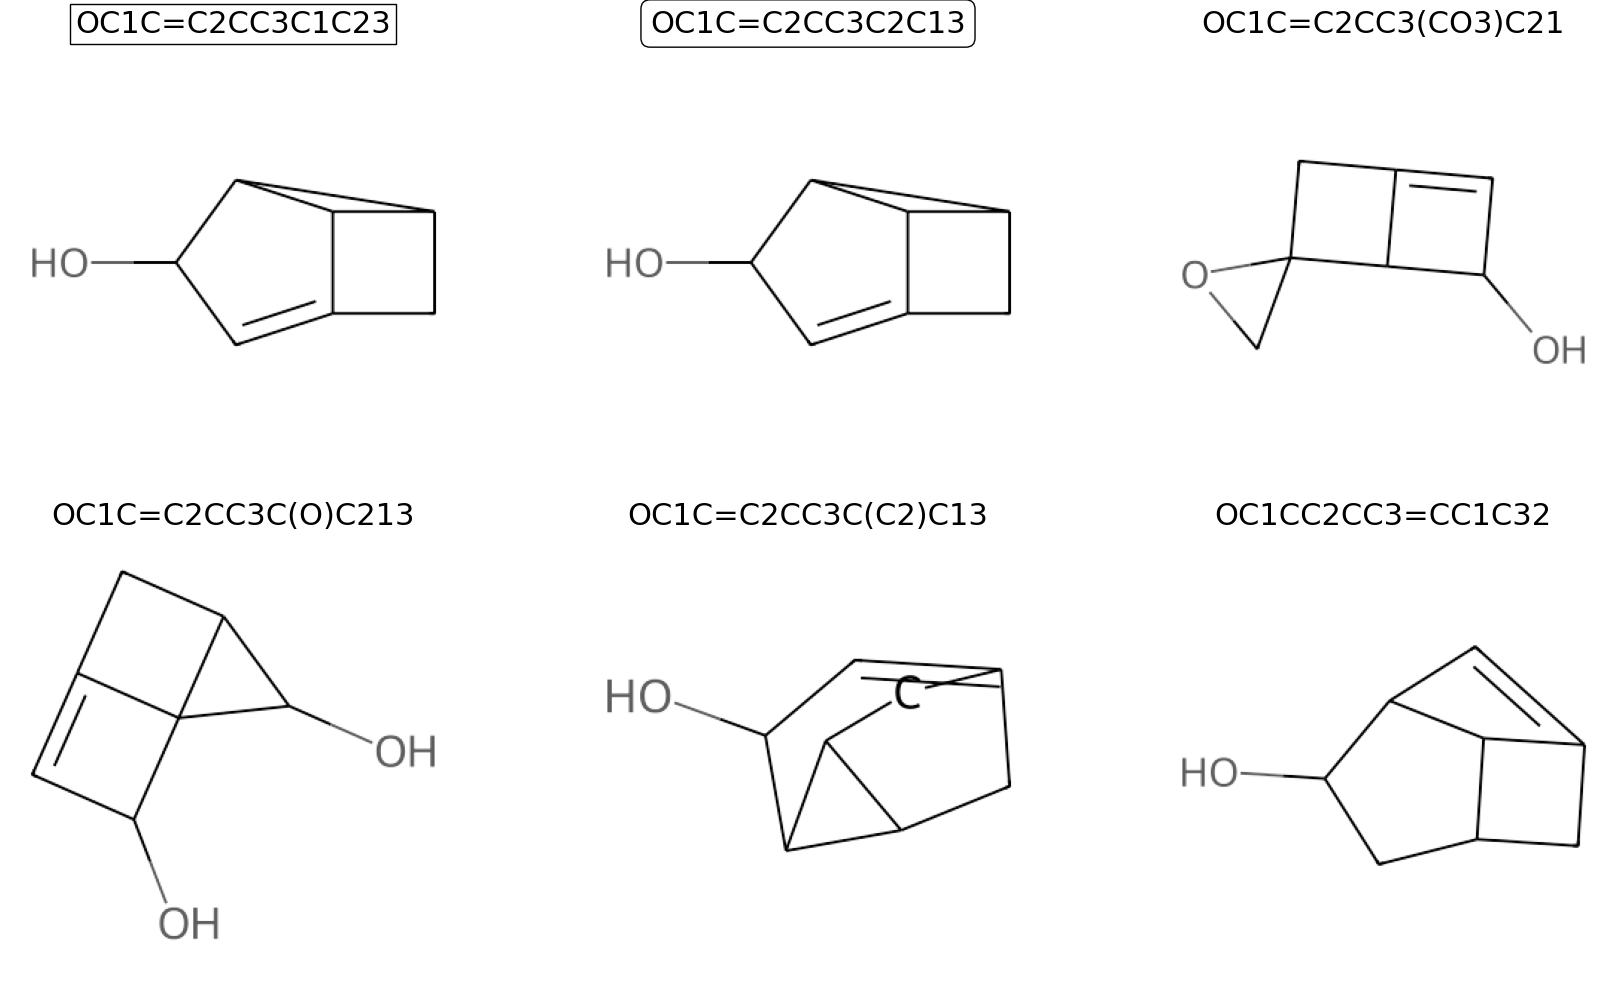

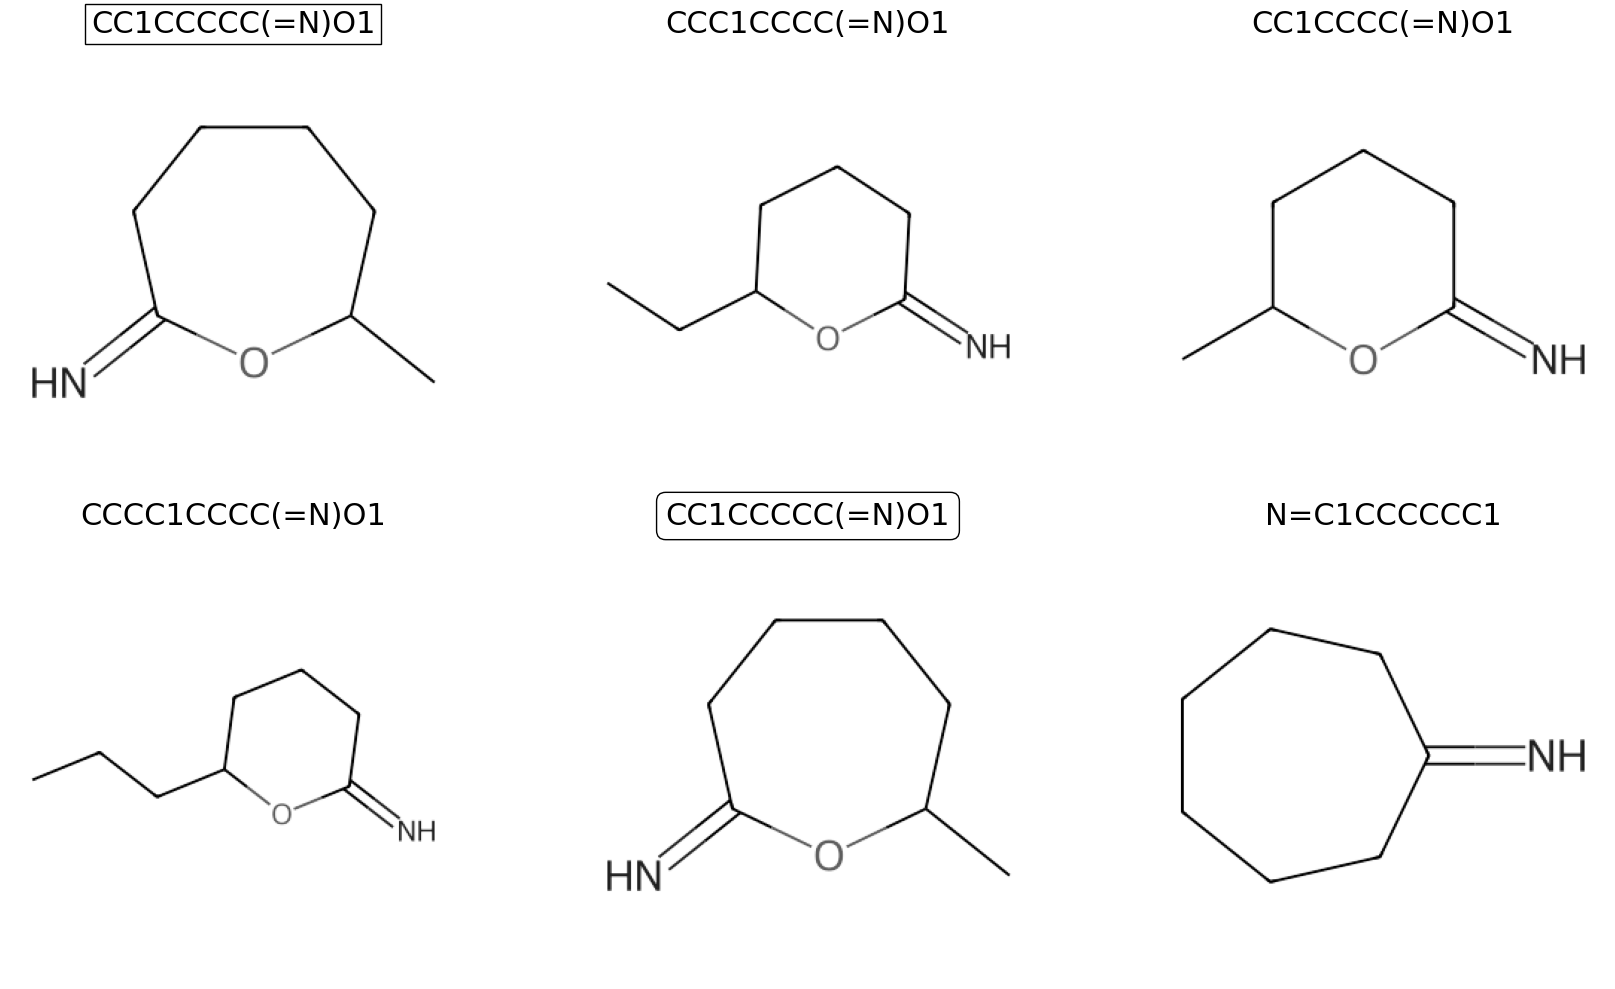

[02:46:36] Explicit valence for atom # 6 N, 4, is greater than permitted
[02:46:36] Explicit valence for atom # 6 N, 4, is greater than permitted
[02:46:36] SMILES Parse Error: extra close parentheses while parsing: NC1=CN=CC=C1CO)=
[02:46:36] SMILES Parse Error: Failed parsing SMILES 'NC1=CN=CC=C1CO)=' for input: 'NC1=CN=CC=C1CO)='
[02:46:36] SMILES Parse Error: unclosed ring for input: 'NC1=CN=CN=C1CO1'
[02:46:36] SMILES Parse Error: extra close parentheses while parsing: NC1=CN=CC=C1CO)
[02:46:36] SMILES Parse Error: Failed parsing SMILES 'NC1=CN=CC=C1CO)' for input: 'NC1=CN=CC=C1CO)'


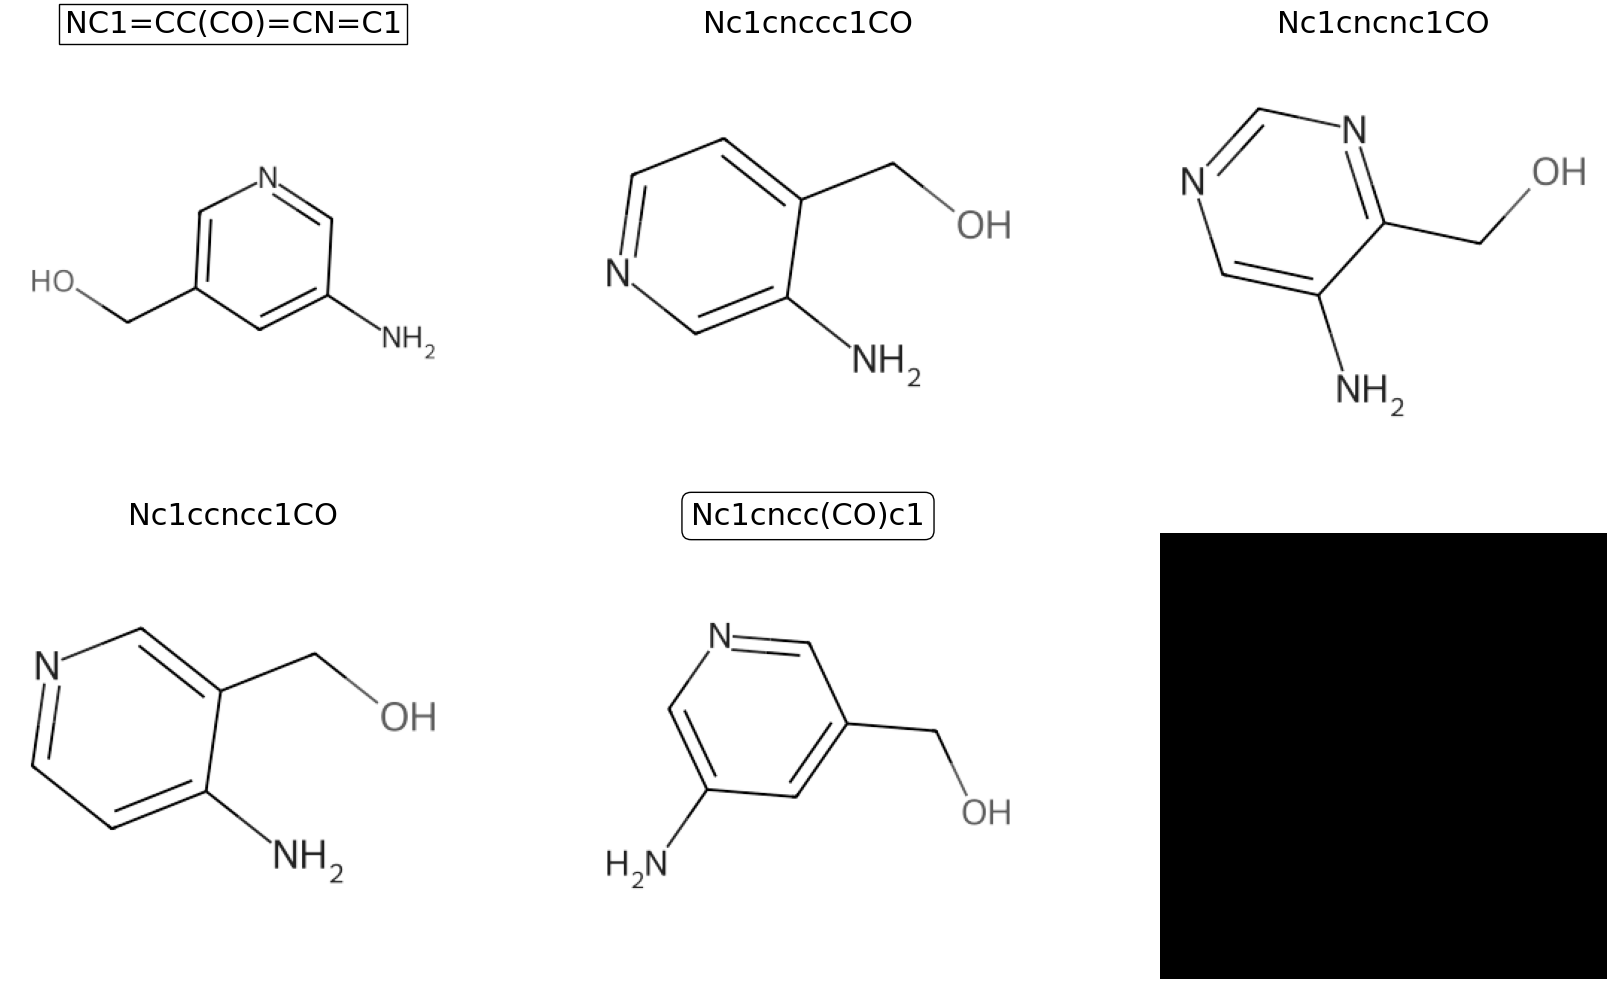

[02:46:38] SMILES Parse Error: unclosed ring for input: 'OCC1CC1(O)C#C2'


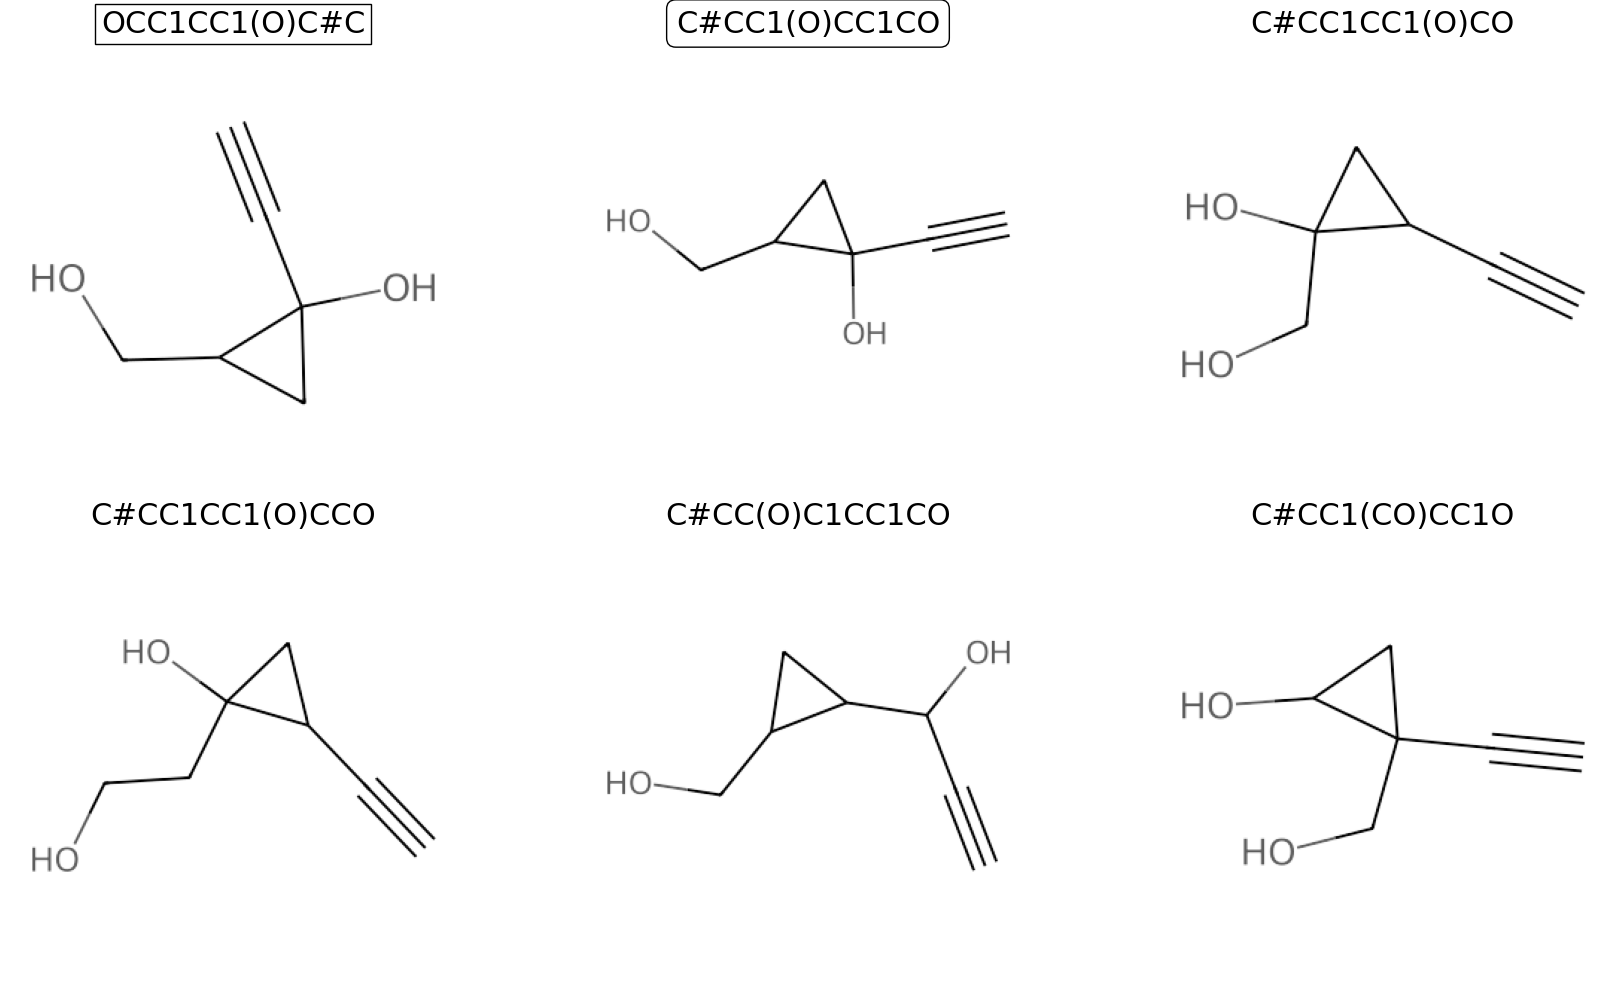

[02:46:40] SMILES Parse Error: unclosed ring for input: 'COC1(CC(C)=CC)'


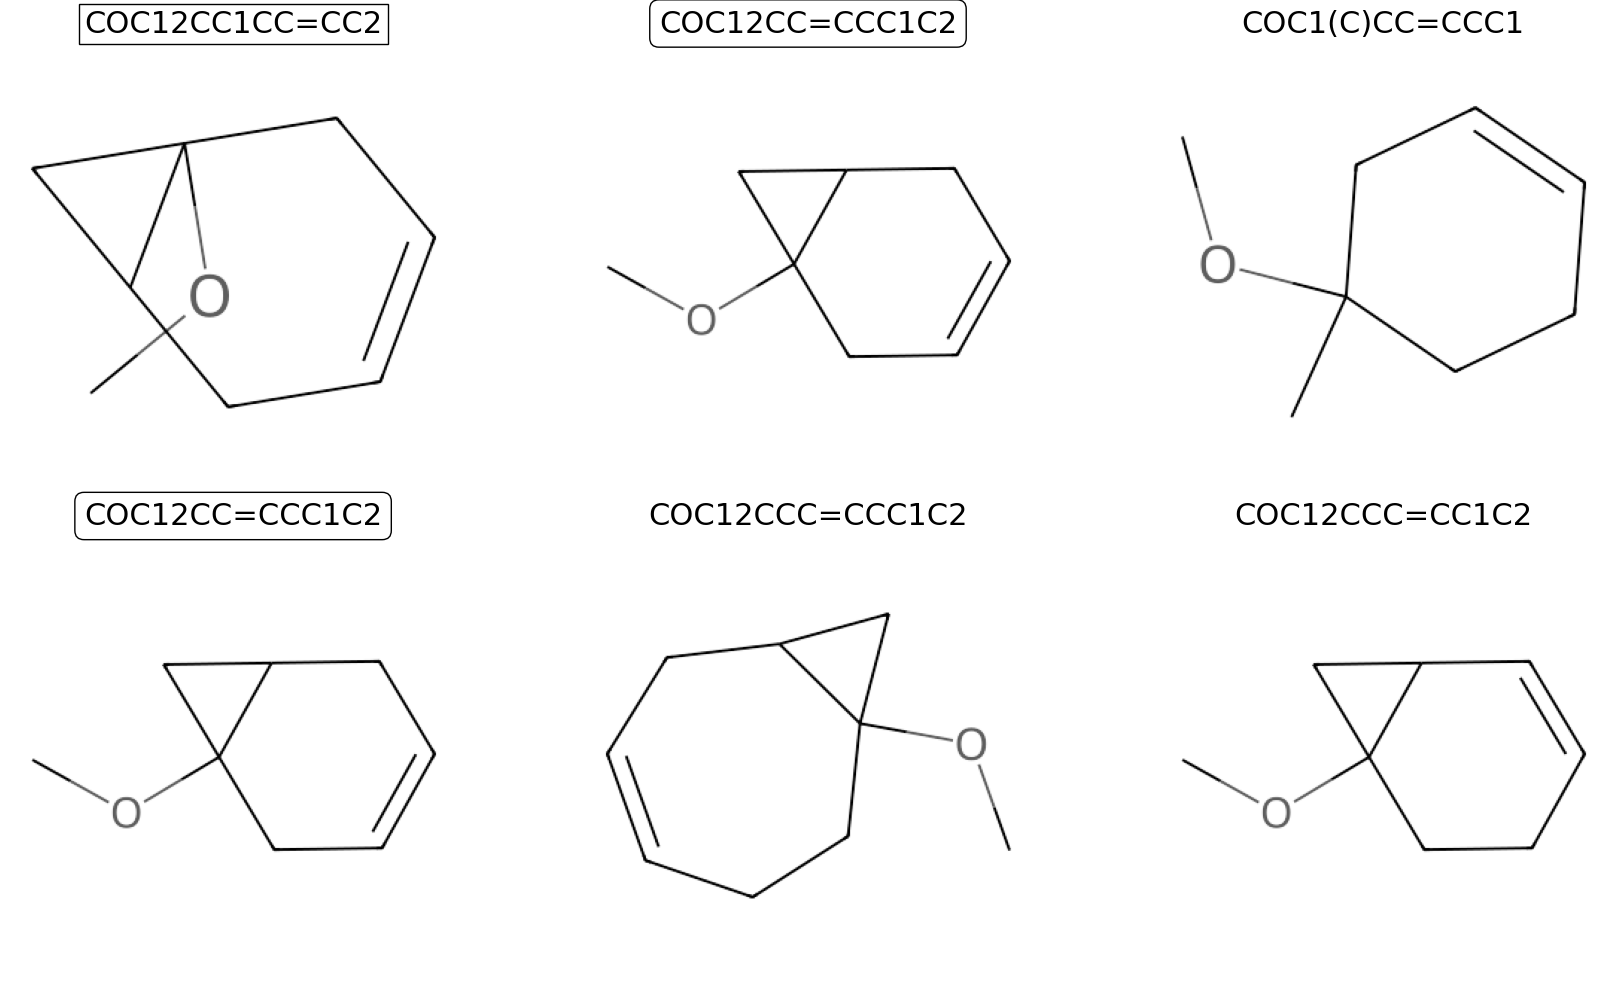

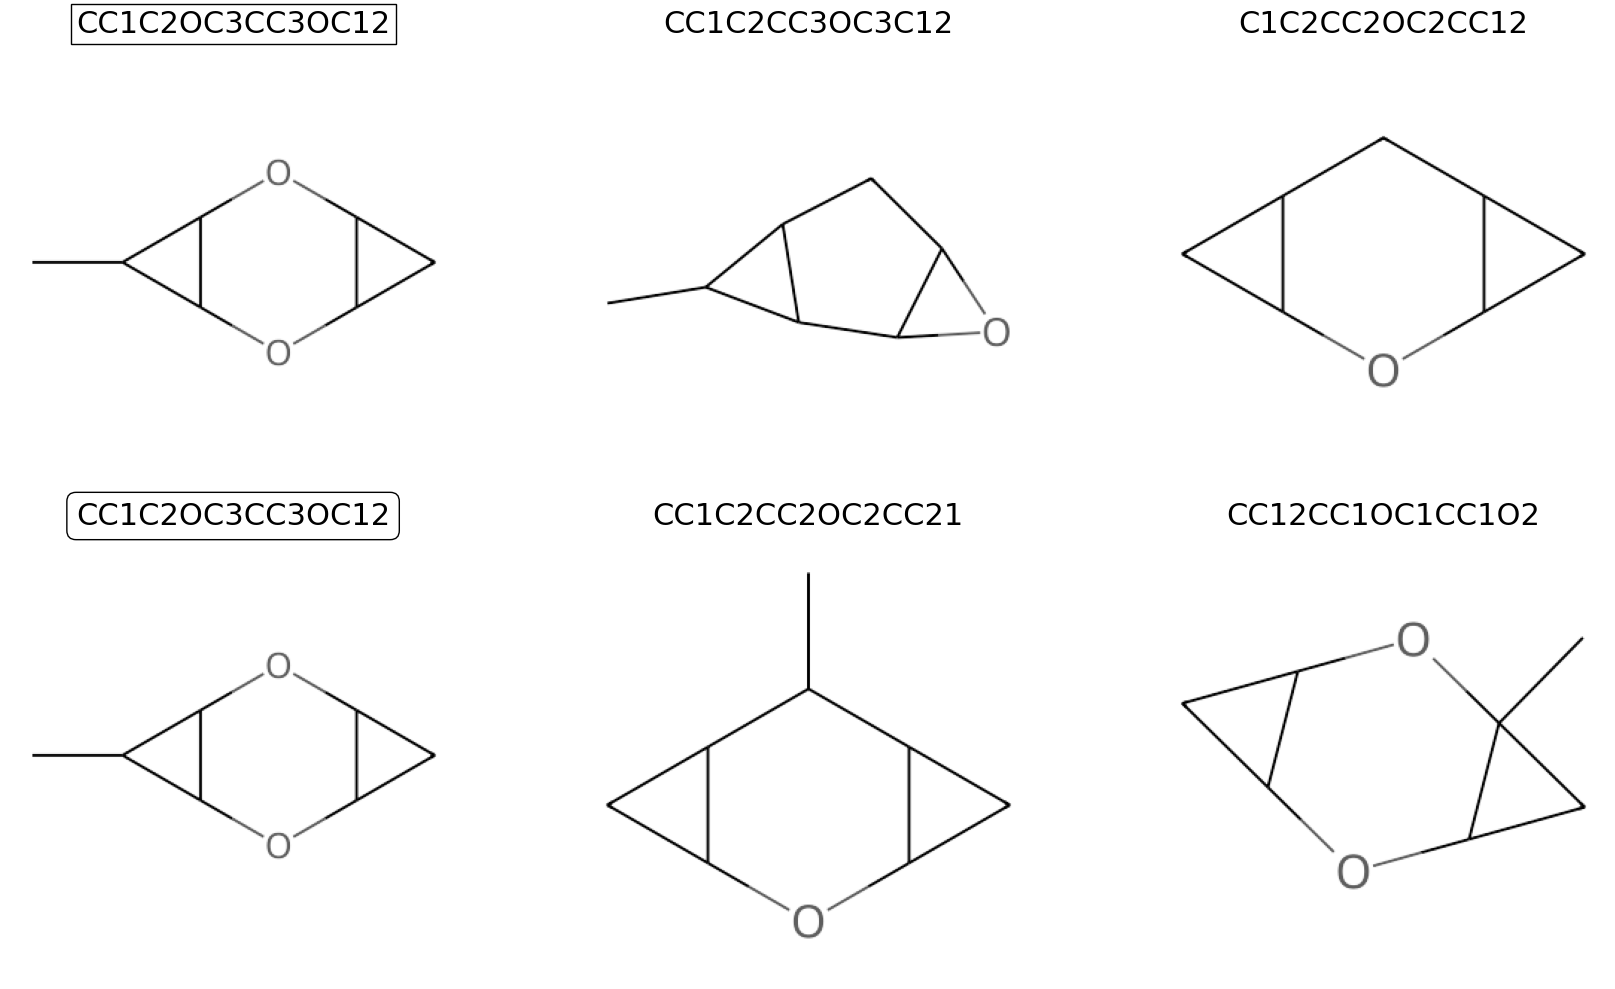

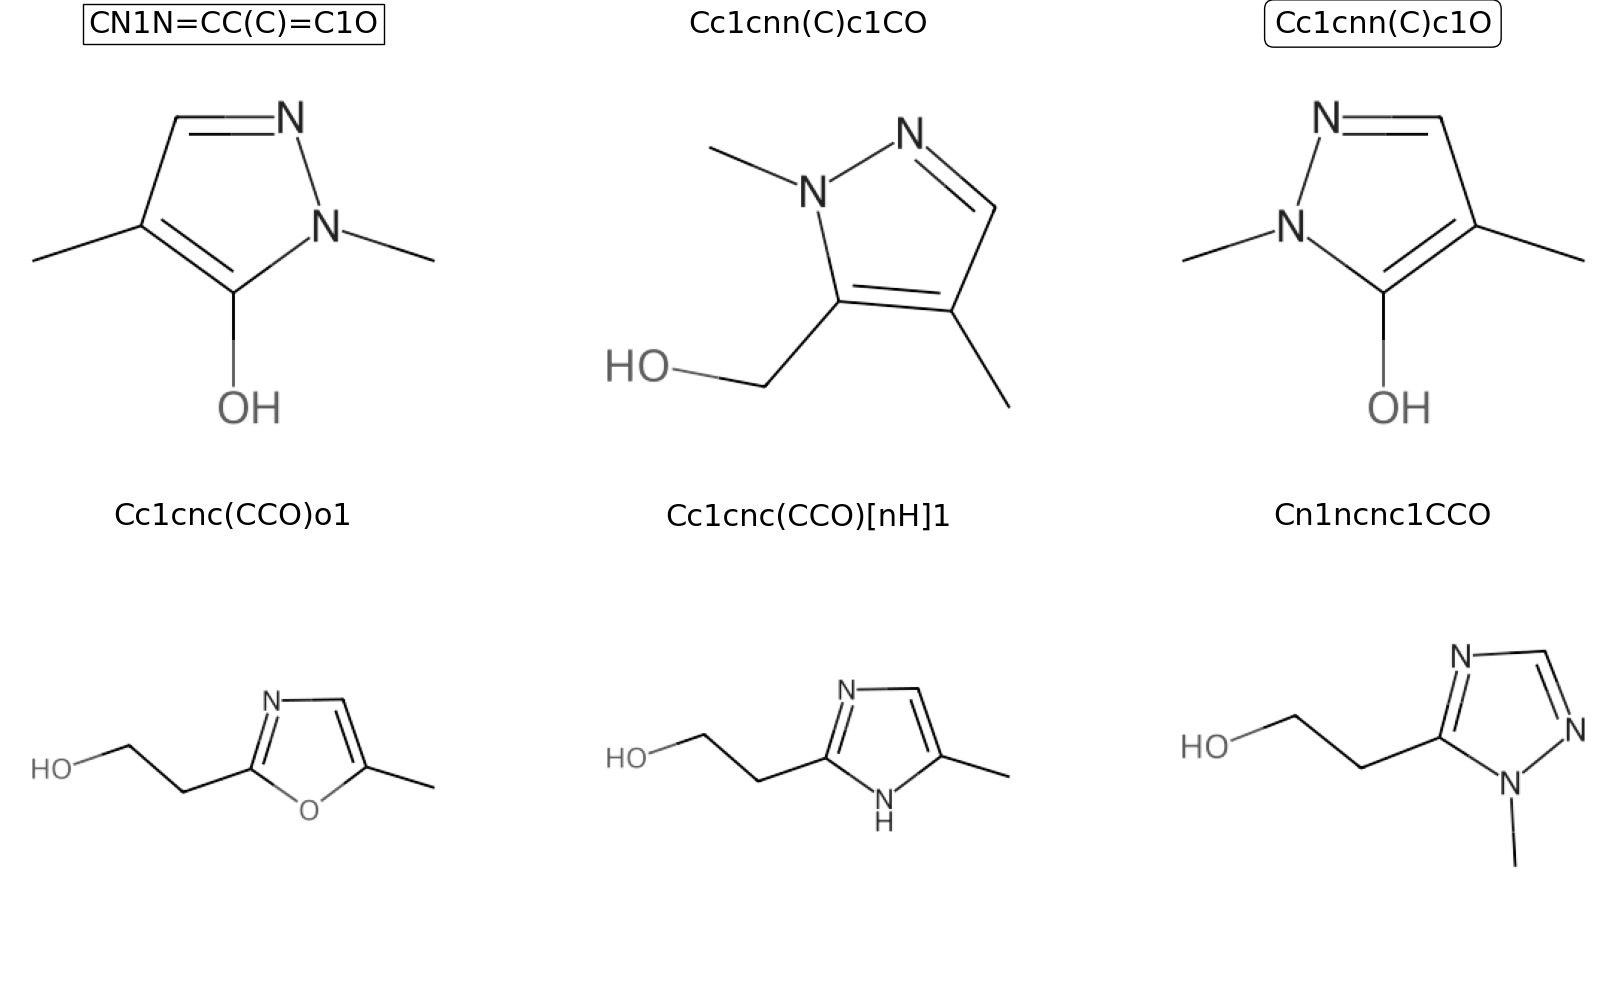

2.43 s ± 158 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
rand_id = int(torch.randint(0, len(ic_test_set), (1,)))
draw_mols(clams, roberta_tokenizer, ic_test_set, rand_id)

# Heatmap Plots

In [ ]:
from ir_smarts import SMARTS
import pandas as pd
import json


fg_names = list(SMARTS.keys())
model_chk_point = config['ic_training']['model_dir']
unmatched = json.load(open(os.path.join(model_chk_point, "unmatched.json")))['15']

perf_df = pd.DataFrame(columns=['idx', 'smiles'] + fg_names + ['matched'])

loc = 0
for item in test_dataset:
    labels = item[0].numpy().tolist()
    row = [loc, item[1]] + labels + [0 if loc in unmatched else 1]
    perf_df.loc[loc] = row
    loc += 1

perf_df

,idx,smiles,alkane,alkene,alkyne,arene,haloalkane,alcohol,aldehyde,ketone,...,ether,amine,amide,nitrile,imide,thial,phenol,enamine,carbamate,matched
0,0,CC#CC1CC1C(C)C,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,O=CC1C2CC3C2OC13,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
2,2,CC(CCNC=O)C=O,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,3,COC1C(C)C1(O)C=O,1,0,0,0,0,1,1,0,...,1,0,0,0,0,1,0,0,0,0
4,4,O=C1CCC2=NC=NN12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12742,12742,CCC(=O)C(=N)NC,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
12743,12743,CC(C)C1COC=N1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
12744,12744,N#CC1=NCCCCO1,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
12745,12745,CC(=O)C1C2OC1C=C2,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
perf_df.sum(axis=0)

idx                                                    81236631
smiles        CC#CC1CC1C(C)CO=CC1C2CC3C2OC13CC(CCNC=O)C=OCOC...
alkane                                                    11846
alkene                                                     1635
alkyne                                                     1629
arene                                                        27
haloalkane                                                  217
alcohol                                                    4128
aldehyde                                                   1484
ketone                                                     1434
ester                                                       410
ether                                                      5589
amine                                                      3845
amide                                                       875
nitrile                                                    1541
imide                                   

In [ ]:
# Calculate ratios for each column 'A', 'B', 'C'
ratios = {}

for col in fg_names:
    # Filter rows where column col is equal to 1
    filtered_rows = perf_df[perf_df[col] == 1]

    # Calculate prediction success ratio for molecules by functional groups
    ratio = filtered_rows['matched'].value_counts(normalize=True).get(1, 0)

    # Store the ratio in the dictionary
    ratios[col] = ratio

success_ratio = sorted(ratios.items(), key=lambda x: x[1], reverse=True)
logging.info("Prediction success ratio by functional groups: %s", success_ratio)

2024-06-10 22:39:13,953 root - INFO - Prediction success ratio by functional groups: [('arene', 0.9629629629629629), ('alkyne', 0.9103744628606507), ('ester', 0.8975609756097561), ('carbamate', 0.8823529411764706), ('phenol', 0.8757763975155279), ('aldehyde', 0.8692722371967655), ('thial', 0.8692722371967655), ('nitrile', 0.8656716417910447), ('ketone', 0.8507670850767085), ('amide', 0.8434285714285714), ('alcohol', 0.8333333333333334), ('alkane', 0.8231470538578423), ('ether', 0.8223295759527643), ('enamine', 0.8206896551724138), ('alkene', 0.8171253822629969), ('haloalkane', 0.7972350230414746), ('imide', 0.7857142857142857), ('amine', 0.7799739921976593)]


In [ ]:
success_ratio_df = pd.DataFrame(success_ratio, columns=['Group', 'Score'])
success_ratio_df.to_hdf(
          os.path.join(config['vit']['model_dir'], "success_ratio.h5"),
          key='success_ratio', mode='w')

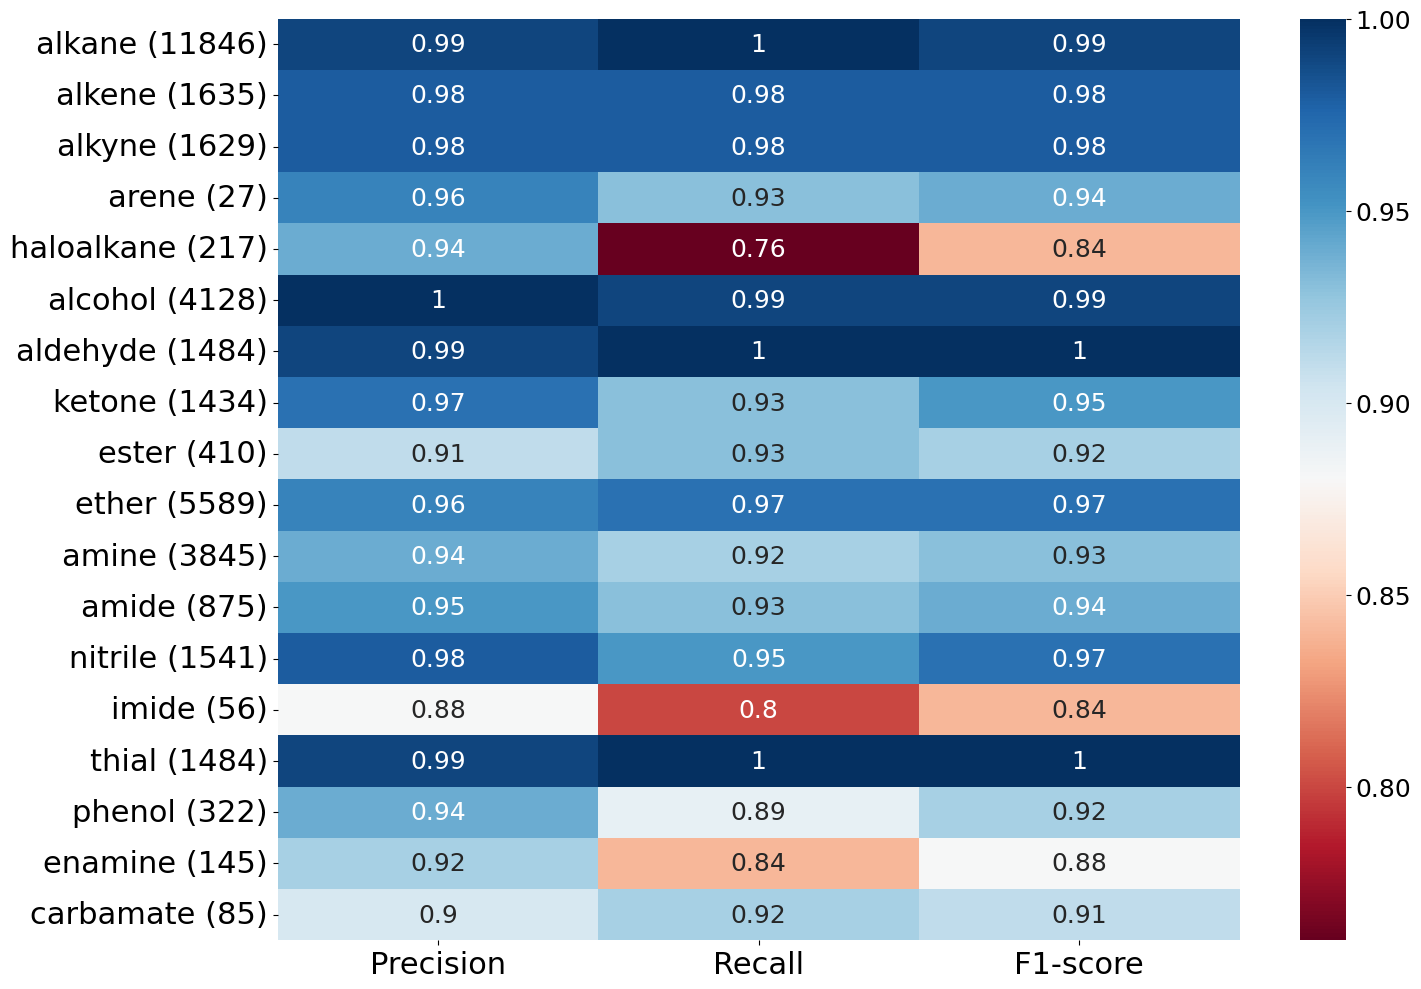

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def plot_classification_report(classification_report,
                title=None, cmap='RdBu', fontsize=22):
    lines = classification_report.split('\n')
    classes = []
    plotMat = []
    support = []
    for line in lines[2 : (len(lines) - 5)]:
        t = line.strip().split()
        if len(t) < 2:
            continue
        classes.append(t[0])

        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        plotMat.append(v)

    plotMat = np.array(plotMat)
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(classes[idx], sup) for idx, sup in enumerate(support)]
    plt.figure(figsize=(15, 10))
    ax = sns.heatmap(plotMat, annot=True, cmap=cmap, xticklabels=xticklabels,
                yticklabels=yticklabels, annot_kws={"size": 18})

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=18)

    if title:
        plt.title(title, fontsize=fontsize)

    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.tight_layout()

    plt.savefig(os.path.join(base_dir, 'figs', 'classification_report.png'), dpi=300)
    plt.show()


with open(os.path.join(config['vit']['model_dir'], f"vit_test_results_{run}.json"), 'r') as fd:
    vit_test_ret = json.load(fd)

plot_classification_report(vit_test_ret['classification_report'])

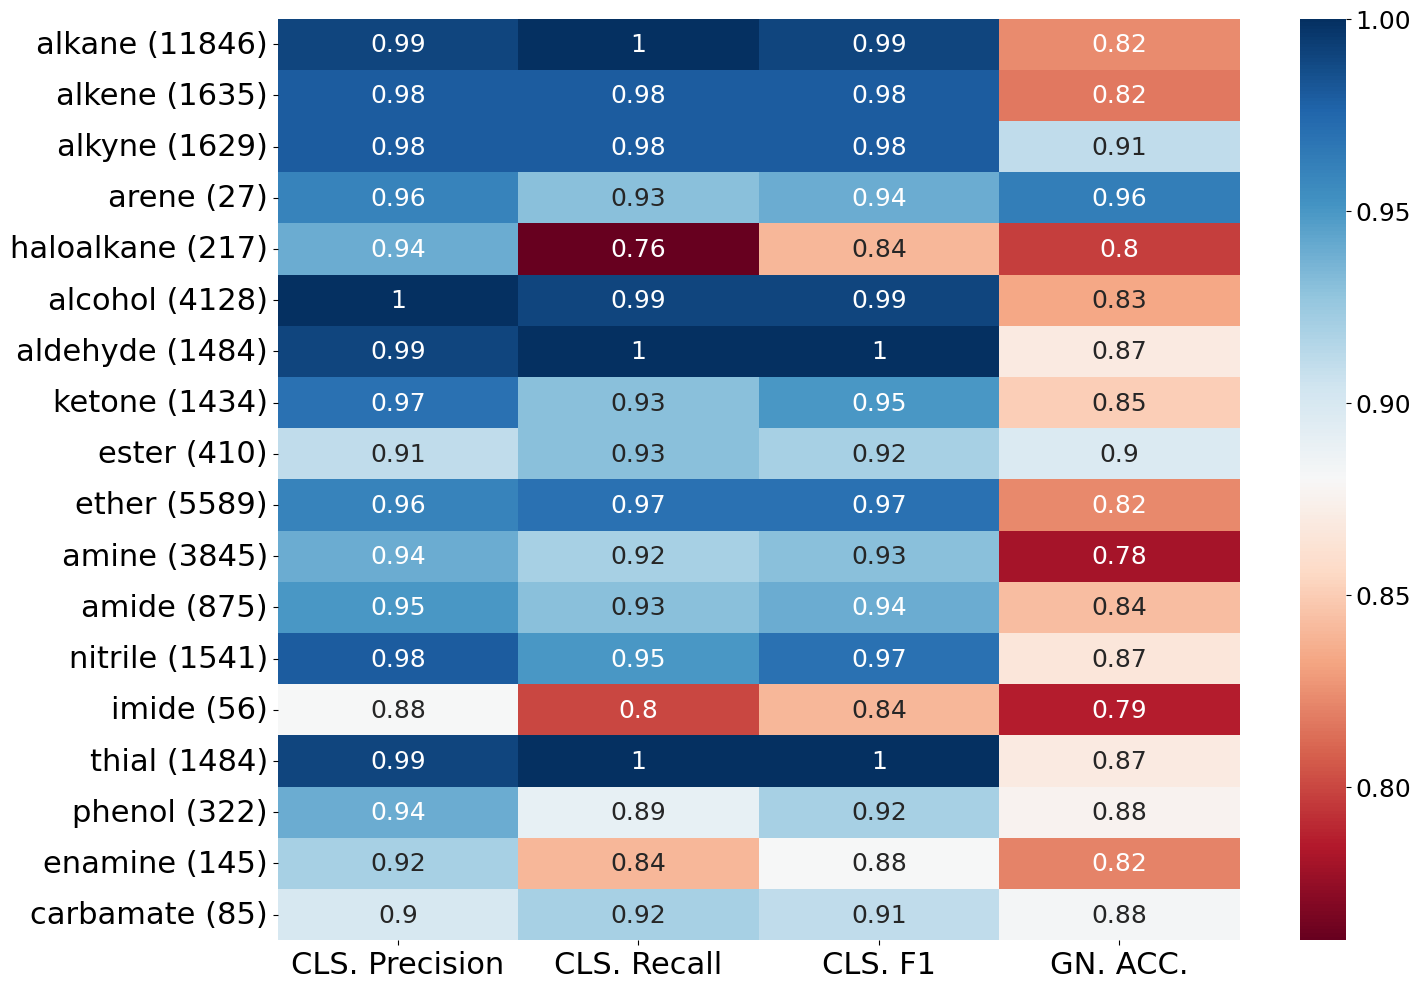

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_classification_report(classification_report, accuracy,
                  title='Classification report', cmap='RdBu', fontsize=22):

    lines = classification_report.split('\n')
    classes = []
    plotMat = []
    support = []
    for line in lines[2 : (len(lines) - 5)]:
        t = line.strip().split()
        if len(t) < 2:
            continue
        classes.append(t[0])

        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        plotMat.append(v)

    plotMat = np.array(plotMat)

    # Append accuracy values based on class names
    accuracy_dict = dict(accuracy)
    accuracy_values = [accuracy_dict.get(cls, 0) for cls in classes]
    plotMat = np.column_stack((plotMat, accuracy_values))

    xticklabels = ['CLS. Precision', 'CLS. Recall', 'CLS. F1', 'GN. ACC.']
    yticklabels = ['{0} ({1})'.format(classes[idx], sup) for idx, sup in enumerate(support)]

    plt.figure(figsize=(15, 10))
    ax = sns.heatmap(plotMat, annot=True, cmap=cmap, xticklabels=xticklabels,
                yticklabels=yticklabels, annot_kws={"size": 18})

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=18)

    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.tight_layout()

    plt.savefig(os.path.join(base_dir, 'figs', f'classification_report_v2_{run}.png'), dpi=300)
    plt.show()

plot_classification_report(vit_test_ret['classification_report'], success_ratio)